In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()#data frame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Amount distribution')

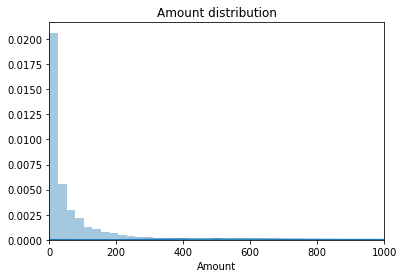

In [4]:
sns.distplot(df.Amount, bins=1000)
plt.xlim(0,1000)
plt.title('Amount distribution')

In [5]:
df= df.sample(frac=0.1, random_state = 48)
print(df.shape)
print(df.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [7]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
Lrc = LogisticRegression().fit(X_train, y_train)

In [8]:
cross_val_score(Lrc, X, y, cv= 10)

array([0.998245  , 0.99964888, 0.99964888, 0.99894663, 0.99894663,
       0.99894663, 1.        , 0.99964888, 1.        , 0.99964888])

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
Lrc.coef_   #conveys which parameter is  more important

array([[-1.27141015e-04,  3.16388135e-01, -2.77775392e-01,
        -1.03749129e+00,  2.82139889e-01, -1.21975771e-01,
        -2.14167701e-02, -2.48838625e-01,  2.15122460e-02,
        -6.63110112e-01, -5.48693838e-01,  1.03633939e-01,
        -3.79468376e-01, -3.75519393e-01, -1.49967306e+00,
        -1.63128001e-01, -7.52981186e-01, -1.25529820e+00,
        -3.24297807e-01,  1.37987640e-01,  8.64663843e-02,
         3.09777473e-01,  1.53902077e-01, -3.97948803e-03,
        -3.20075989e-02, -7.31138525e-02,  5.57999930e-02,
        -2.88462436e-02,  8.86812624e-02, -1.01181946e-02]])

In [11]:
lr_pred = Lrc.predict(X_test)

In [12]:
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[9375    7]
 [   1   16]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9382
           1       0.70      0.94      0.80        17

    accuracy                           1.00      9399
   macro avg       0.85      0.97      0.90      9399
weighted avg       1.00      1.00      1.00      9399



In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
y = df.Class
X = df.drop('Class', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
cross_val_score(Rfc.fit(X_train, y_train), X, y, cv= 10)

array([0.998947  , 0.99964888, 0.99964888, 0.99964888, 0.99964888,
       0.99964888, 0.99964888, 0.99964888, 1.        , 0.99964888])

In [19]:
rf_pred = Rfc.predict(X_test)

In [20]:
lr_pred = Rfc.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[9377    0]
 [   3   19]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9377
           1       1.00      0.86      0.93        22

    accuracy                           1.00      9399
   macro avg       1.00      0.93      0.96      9399
weighted avg       1.00      1.00      1.00      9399



In [21]:
import sklearn
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [22]:
svc = SVC()

y = df.Class
X = df.drop(df[['Class']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [23]:
ss = StandardScaler().fit_transform(X_train)

In [24]:
sklearn_pca = sklearn.decomposition.PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(ss)
X_PCA = pd.DataFrame(Y_sklearn)
print( 'The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n', sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.06446724 0.05707452 0.03899403 0.03805713 0.03639713]


In [25]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [26]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.998, total=   6.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.998, total=   6.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.998, total=   7.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.998, total=   6.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.998, total=   6.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   6.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   6.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   6.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   7.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.998, total=  43.9s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.998, total=  43.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.998, total=  40.3s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.998, total=  40.3s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.998, total=  43.8s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.998, total=  37.3s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.998, total=  35.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.997, total=  36.9s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.998, total=  36.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.998, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.998, total=   8.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.996, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.997, total=   0.4s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.997, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 62.2min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [28]:
grid_pred = grid.predict(X_test)

In [29]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[14211     0]
 [   30     0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14211
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14241
   macro avg       0.50      0.50      0.50     14241
weighted avg       1.00      1.00      1.00     14241



# KNN

In [30]:
from sklearn import neighbors

In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [33]:
cross_val_score(knn.fit(X_train, y_train), X, y, cv=6)

array([0.99789341, 0.99810407, 0.99810407, 0.99789341, 0.99789341,
       0.99810367])

In [34]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],'weights':['uniform','distance']}

In [35]:
KNN = neighbors.KNeighborsClassifier()

In [36]:
grid = GridSearchCV(KNN,param_grid,verbose=3)

In [37]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=1, weights=uniform, score=0.998, total=   0.7s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.998, total=   0.4s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.996, total=   0.4s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.996, total=   0.5s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.996, total=   0.6s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.998, total=   0.4s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.998, total=   0.4s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.996, total=   0.4s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.996, total=   0.4s
[CV] n_neighbors=1, weights=distance .................................
[CV] .

[CV] ..... n_neighbors=25, weights=uniform, score=0.998, total=   0.4s
[CV] n_neighbors=25, weights=uniform .................................
[CV] ..... n_neighbors=25, weights=uniform, score=0.998, total=   0.4s
[CV] n_neighbors=25, weights=uniform .................................
[CV] ..... n_neighbors=25, weights=uniform, score=0.998, total=   0.4s
[CV] n_neighbors=25, weights=uniform .................................
[CV] ..... n_neighbors=25, weights=uniform, score=0.998, total=   0.4s
[CV] n_neighbors=25, weights=uniform .................................
[CV] ..... n_neighbors=25, weights=uniform, score=0.998, total=   0.4s
[CV] n_neighbors=25, weights=distance ................................
[CV] .... n_neighbors=25, weights=distance, score=0.998, total=   0.3s
[CV] n_neighbors=25, weights=distance ................................
[CV] .... n_neighbors=25, weights=distance, score=0.998, total=   0.3s
[CV] n_neighbors=25, weights=distance ................................
[CV] .

[CV] ... n_neighbors=100, weights=distance, score=0.998, total=   0.4s
[CV] n_neighbors=100, weights=distance ...............................
[CV] ... n_neighbors=100, weights=distance, score=0.998, total=   0.5s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   57.0s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20, 25, 30, 40, 50,
                                         75, 100],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [38]:
grid_pred = grid.predict(X_test)

In [39]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[14211     0]
 [   30     0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14211
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14241
   macro avg       0.50      0.50      0.50     14241
weighted avg       1.00      1.00      1.00     14241

